In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import os
%matplotlib inline
#os.environ['HOPSWORKS_API_KEY'] = 'cKV1tKzokpcwviY6.uP2qcFV2wWI8xxNu1I0UxyeqlRHqSEanLgKFjf5R1ypSy8A3AUnRkRpi0R9Gc5l0'

In [2]:
import hopsworks
import pandas as pd

/home/francisco/Tecnico/KTH/ScalableMachineLearningAndDeepLearning/id2223_lab1_wine/venv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/195738
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("wine.csv")
wine_df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
print(wine_df.duplicated().sum())
wine_df.drop_duplicates(inplace=True)
print(wine_df.duplicated().sum())

1168
0


In [8]:
wine_df['quality'].value_counts()

quality
6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: count, dtype: int64

### Exploratory Data Analysis (EDA) our Wine Data

Let's look at our wines - the distribution and range of values for the 11 different features
 * fixed acidity
 * volatile acidity
 * citric acid
 * residual sugar
 * chlorides
 * free sulfur dioxide
 * total sulfur dioxide 
 * density
 * pH
 * sulphates
 * alcohol

 and the target variable is `quality`.

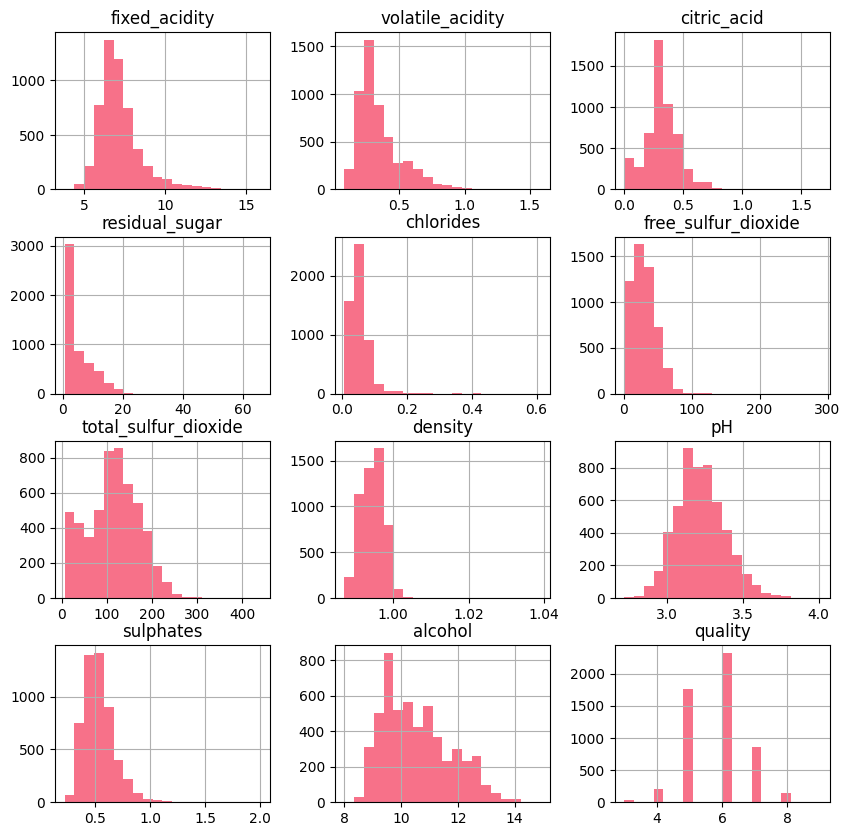

In [9]:
wine_df.hist(bins=20, figsize=(10, 10))
plt.show()

### Visualize range of values 
Here we can see the relation between the degree of alcohol and their quality. We can change the feature selected (here alcohol) to look for other relations.

2023-11-20 17:36:12,821 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 17:36:12,831 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'alcohol vs quality')

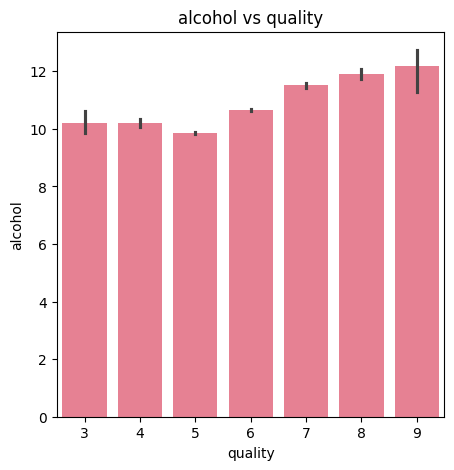

In [10]:
#Relation between alcohol vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='alcohol', data=wine_df)
plt.title('alcohol vs quality')

2023-11-20 17:36:13,161 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-11-20 17:36:13,173 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'volatile acidity vs quality')

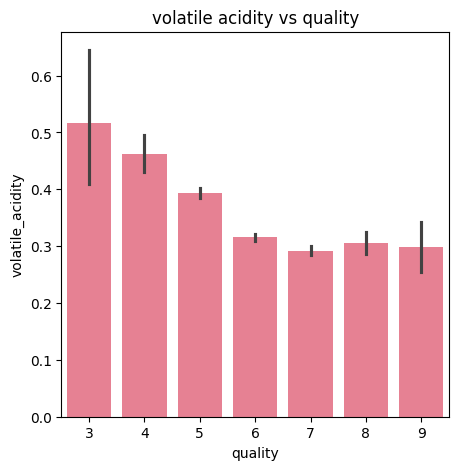

In [11]:
#Relation between volatile acidity vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='volatile_acidity', data=wine_df)
plt.title('volatile acidity vs quality')

2023-11-20 17:36:13,654 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-11-20 17:36:13,670 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'citric acid vs quality')

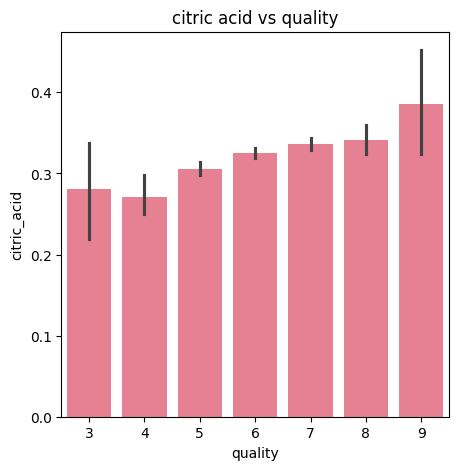

In [12]:
#Relation between citric acid vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='citric_acid', data=wine_df)
plt.title('citric acid vs quality')

In [13]:
wine_df.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [14]:
#Lets replace white wines with 1 and red wines with 0
wine_df.replace({'white': 1, 'red': 0}, inplace=True)

#Lets replace the null values with mean
wine_df.fillna(wine_df.mean(), inplace=True)
wine_df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

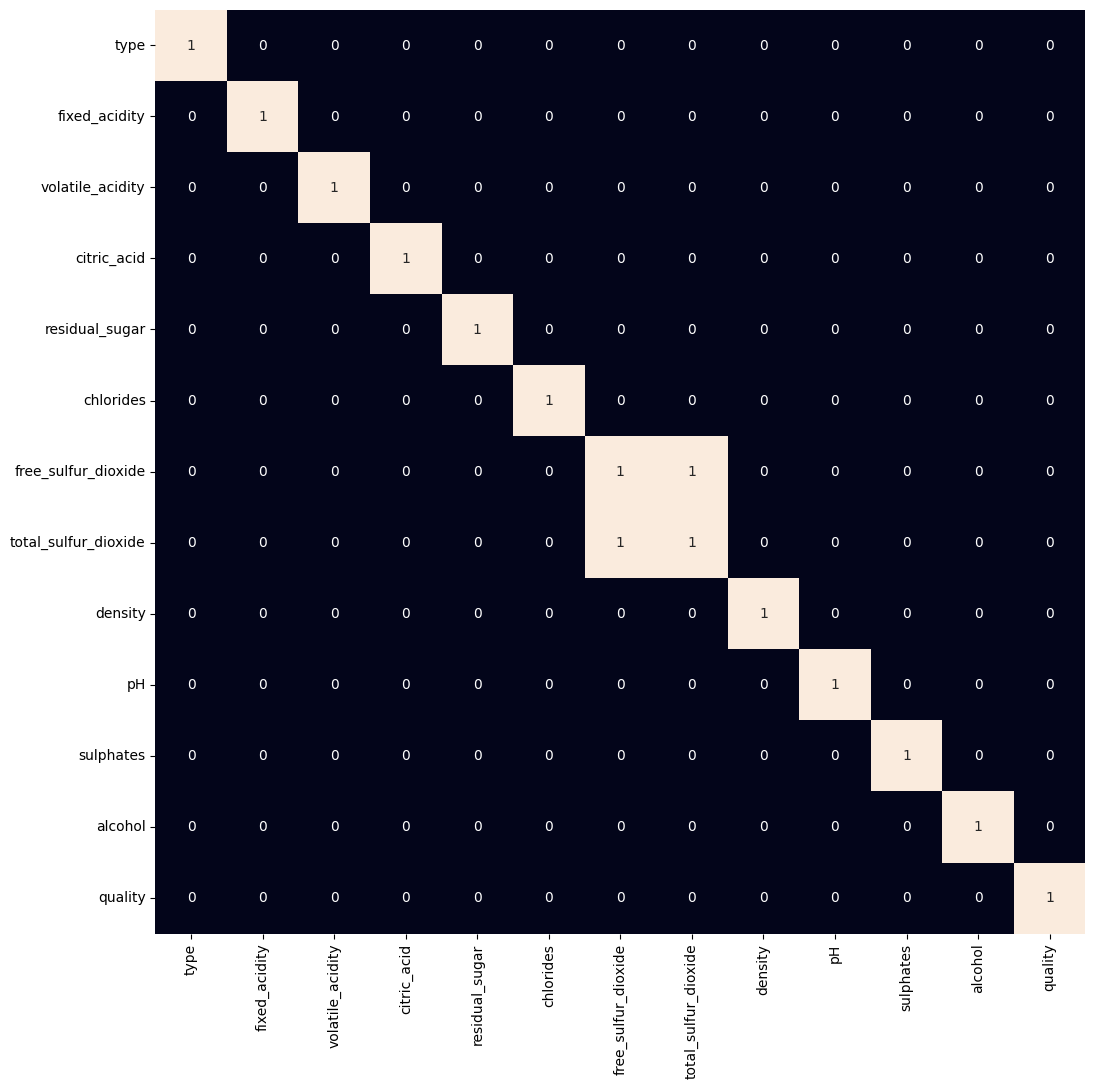

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(wine_df.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heat map we can conclude that the "total sulphur dioxide" and "free sulphur dioxide" features are highly correlated features so, we will remove one of them.

In [16]:
wine_df = wine_df.drop('total_sulfur_dioxide', axis=1)

In [17]:
wine_df['quality_label'] = wine_df['quality'].apply(lambda x: 'poor' if x <= 4 else 'medium' if x <= 6 else 'good')
wine_df.drop('quality', axis=1, inplace=True)

In [19]:
# Lets see what are the min and max values for each feature for each quality label

# Group the dataframe by the 'quality_label' column
grouped_df = wine_df.groupby('quality_label')

# Iterate over each group
for label, group in grouped_df:
    print(f"--- {label} wines ---")
    
    # Iterate over each feature column
    for feature in wine_df.columns[:-1]:
        min_val = group[feature].min()
        max_val = group[feature].max()
        print(f"{feature}: Min = {min_val}, Max = {max_val}")
    
    print()


--- good wines ---
type: Min = 0, Max = 1
fixed_acidity: Min = 3.9, Max = 15.6
volatile_acidity: Min = 0.08, Max = 0.915
citric_acid: Min = 0.0, Max = 0.76
residual_sugar: Min = 0.8, Max = 19.25
chlorides: Min = 0.012, Max = 0.358
free_sulfur_dioxide: Min = 3.0, Max = 108.0
density: Min = 0.98711, Max = 1.0032
pH: Min = 2.84, Max = 3.82
sulphates: Min = 0.22, Max = 1.36
alcohol: Min = 8.5, Max = 14.2

--- medium wines ---
type: Min = 0, Max = 1
fixed_acidity: Min = 3.8, Max = 15.9
volatile_acidity: Min = 0.08, Max = 1.33
citric_acid: Min = 0.0, Max = 1.66
residual_sugar: Min = 0.6, Max = 65.8
chlorides: Min = 0.009, Max = 0.611
free_sulfur_dioxide: Min = 1.0, Max = 131.0
density: Min = 0.98722, Max = 1.03898
pH: Min = 2.72, Max = 4.01
sulphates: Min = 0.23, Max = 1.98
alcohol: Min = 8.0, Max = 14.9

--- poor wines ---
type: Min = 0, Max = 1
fixed_acidity: Min = 4.2, Max = 12.5
volatile_acidity: Min = 0.11, Max = 1.58
citric_acid: Min = 0.0, Max = 1.0
residual_sugar: Min = 0.7, Max = 17

In [18]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=2,
    primary_key=["type", "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "density", "ph", "sulphates", "alcohol"],
    description="Wine quality dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/195738/fs/195657/fg/241003


Uploading Dataframe: 100.00% |██████████| Rows 5329/5329 | Elapsed Time: 00:08 | Remaining Time: 00:00


Launching job: wine_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/195738/jobs/named/wine_2_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f93dec4b730>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent wine quality data from being written your your feature group if you write values outside the expected ranges.

In [41]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [43]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

expect(suite, "fixed_acidity", 3.8, 15.9)
expect(suite, "volatile_acidity", 0.08, 1.58)
expect(suite, "citric_acid", 0, 1.66)
expect(suite, "residual_sugar", 0.6, 65.8)
expect(suite, "chlorides", 0.009, 0.611)
expect(suite, "free_sulfur_dioxide", 1, 289)
expect(suite, "density", 0.98711, 1.03898)
expect(suite, "ph", 2.72, 4.01)
expect(suite, "sulphates", 0.22, 2)
expect(suite, "alcohol", 8, 14.9)
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/196759/fs/196678/fg/237972
